In [1]:
#Libraries requirements
# https://scikit-learn.org/stable/ --- Scientific kit of pre built machine learning algos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#markdown support for customizable print
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

##### ===============================================================================

### Dataset: A magazine seller want’s to sell an email to the customer about his new kid’s magazine.Before making his marketing efforts he wants to know that which customer will buy the kid’s magazine.

#### We have purchase history.

### Objective: Predict the chance of a customer purchasing the kid’s magazine
##### ===============================================================================

In [3]:
#Import the dataset
data=pd.read_csv("./Kidcreative.csv",sep=',')
data_orig=data.copy()

##### ===============================================================================

## Exploratory Data Analysis - 
#### Dataset exploration, visualization, cleaning

### 1) Attributes/Features/Columns & Data Types
### 2) Subeste View
### 3) Descriptive Statistics
### 4) Missing Values
### 5)Plot Charts: (Distribution of features)
<ul>
 <li>Bar charts: Deiscrete Variables</li>
 <li>Histogram : Continous Varibale</li>
 <li> Correlation/ Heatmap/ Scatter Plots: Collinearity/ Multi collinearity</li>
 <li> Box Plots: Numeric Vartiables Range/ Quantiles</li>
 </ul>

##### ===============================================================================

In [4]:
# Columns of Dataset
cnt=1
for i in data.columns.to_list():
    print(f"{cnt}: {i}")
    cnt +=1 
    

1: Buy
2: Income
3: Is.Female
4: Is.Married
5: Has.College
6: Is.Professional
7: Is.Retired
8: Unemployed
9: Residence.Length
10: Dual.Income
11: Minors
12: Own
13: House
14: Is.USBorn
15: English
16: Prev.Child.Mag
17: Prev.Parent.Mag


In [5]:
print("==============================================")
print(f"Variable:                  Type: \n{data.dtypes}")

Variable:                  Type: 
Buy                 int64
Income              int64
Is.Female           int64
Is.Married          int64
Has.College         int64
Is.Professional     int64
Is.Retired          int64
Unemployed          int64
Residence.Length    int64
Dual.Income         int64
Minors              int64
Own                 int64
House               int64
Is.USBorn           int64
English             int64
Prev.Child.Mag      int64
Prev.Parent.Mag     int64
dtype: object


In [6]:
# View sample records
rc=data.shape
print("======================================")
printmd(f"**rows: {rc[0]} & columns: {rc[1]}**")
print("======================================")
data.head(10)

**rows: 673 & columns: 17**

,Buy,Income,Is.Female,Is.Married,Has.College,Is.Professional,Is.Retired,Unemployed,Residence.Length,Dual.Income,Minors,Own,House,Is.USBorn,English,Prev.Child.Mag,Prev.Parent.Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
5,0,24000,1,1,0,0,0,0,41,0,0,1,1,0,0,0,0
6,0,26000,1,1,1,0,1,0,20,0,1,1,1,1,1,0,0
7,0,38000,1,1,0,0,1,0,8,0,0,1,1,1,1,0,0
8,0,39000,1,0,1,1,0,0,17,0,0,0,0,1,1,0,0
9,0,49000,0,1,0,0,1,0,31,0,0,1,1,1,1,0,0


In [7]:
#Descriptive Statistics
data.describe(include="all")

,Buy,Income,Is.Female,Is.Married,Has.College,Is.Professional,Is.Retired,Unemployed,Residence.Length,Dual.Income,Minors,Own,House,Is.USBorn,English,Prev.Child.Mag,Prev.Parent.Mag
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,0.185736,35078.751857,0.551263,0.349183,0.289747,0.341753,0.057949,0.031204,17.618128,0.231798,0.364042,0.362556,0.667162,0.692422,0.909361,0.071322,0.084695
std,0.389182,23812.787498,0.497735,0.477066,0.453982,0.474650,0.233822,0.173997,13.555818,0.422294,0.481518,0.481096,0.471580,0.461834,0.287308,0.257554,0.278635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,32000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,52000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,75000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Checking Missing Values
# Dont takee whole datasset to replace missing values introduce cross validation
data.isnull().sum()

Buy                 0
Income              0
Is.Female           0
Is.Married          0
Has.College         0
Is.Professional     0
Is.Retired          0
Unemployed          0
Residence.Length    0
Dual.Income         0
Minors              0
Own                 0
House               0
Is.USBorn           0
English             0
Prev.Child.Mag      0
Prev.Parent.Mag     0
dtype: int64

In [9]:
print(f"Percentage of population who bought magazine: {round(len(data[data['Buy']==1])/len(data)*100,2)}%")
data.Buy.value_counts()


Percentage of population who bought magazine: 18.57%


0    548
1    125
Name: Buy, dtype: int64

In [10]:
def countplot(x,y,d):
    sns.countplot(x=x, hue=y, data=d)

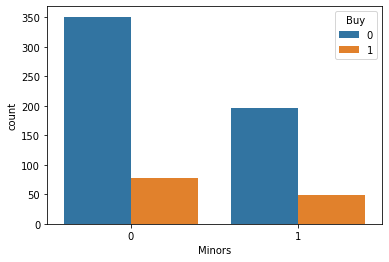

In [12]:
countplot('Minors','Buy',data)


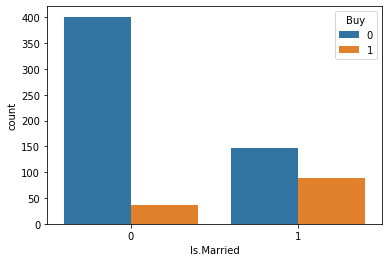

In [13]:
countplot('Is.Married','Buy',data)

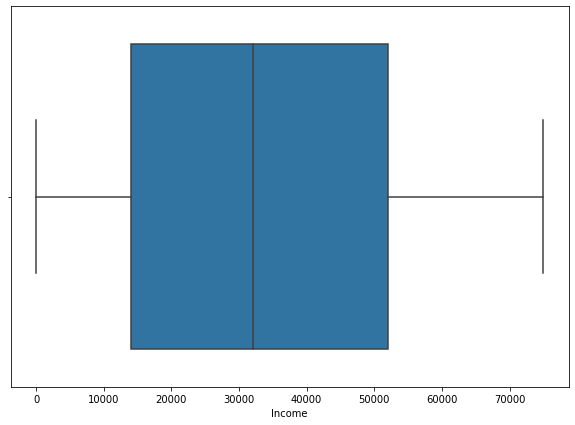

In [14]:
# Income Distribution
plt.figure(figsize=(10,7))
sns.boxplot(x='Income',data=data)

(array([178., 126., 152.,  99.,  43.,  41.,  10.,  16.,   5.,   3.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

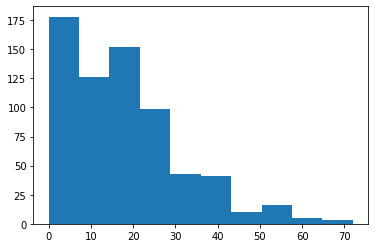

In [15]:
#Length of residence distribution
plt.hist(data['Residence.Length'])

In [16]:
## pearson correlation  
corr = data.corr()
corr.sort_values(["Buy"],ascending = False,inplace = True)
print(corr.Buy)


Buy                 1.000000
Income              0.679241
Own                 0.378955
Is.Married          0.355479
Dual.Income         0.308080
Is.Professional     0.227822
Is.USBorn           0.202405
Has.College         0.200299
House               0.183283
Residence.Length    0.163242
Prev.Child.Mag      0.149717
English             0.084241
Is.Female           0.077529
Prev.Parent.Mag     0.074282
Minors              0.019811
Is.Retired         -0.020338
Unemployed         -0.063738
Name: Buy, dtype: float64


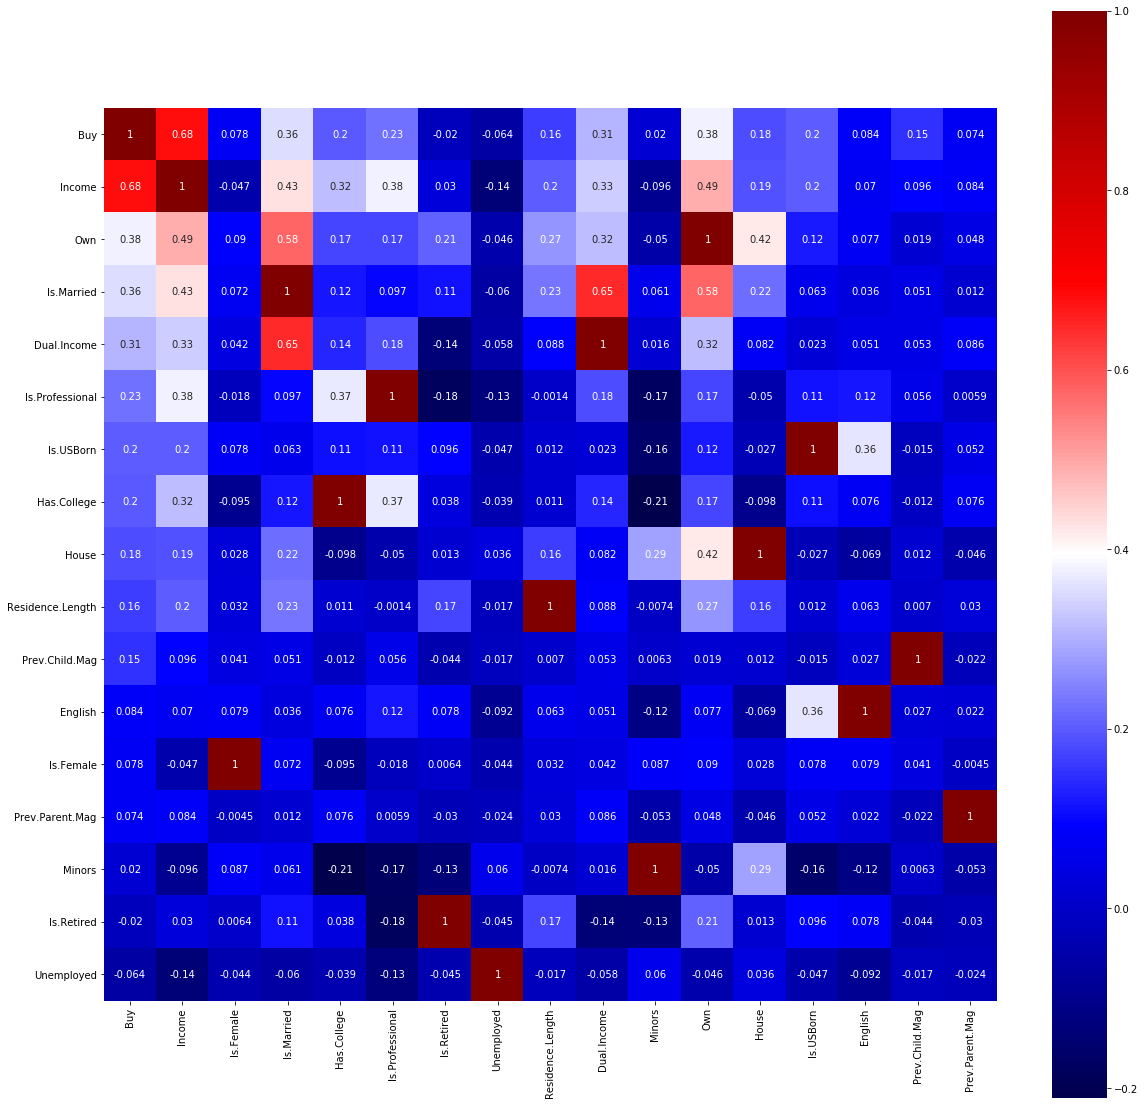

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='seismic')


##### ===============================================================================

### Data Processing
#### 1) Repace Categorical Binary data/ordinal Categorical data with numbers (lambda or map method)
#### 2) Replace Missing Values if any - Mean , Median , Mode (if we have large enough data we can also drop records with missing values dropna() method if they consitute very low percentage of whole
#### 3) Create Dummy Variablesfor categorical data (pd.get_dummies(Categorical_Feature,drop_first=True))
#### 4) Standardize/ Normalize the data -- similar scale units
#### 5) Build new features to improve model- feature engineering
#### 6) Select relevant features/columns making bigger impact
#### 7) Split dataset into Train and Test (Validate optional)
#### 8) Modeling
#### 9) Evaluate the model performance

##### ===============================================================================

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
# standardize
scalar=StandardScaler()

##### ===============================================================================

### Standardizing Income Variable

##### ===============================================================================

In [20]:
data['Income']=scalar.fit_transform(data[['Income']])

##### ===============================================================================

### Feature Transform for "Length of residence"

##### ===============================================================================

In [21]:
data.loc[ data['Residence.Length'] <= 7, 'Residence.Length'] = 0
data.loc[(data['Residence.Length'] > 7) & (data['Residence.Length'] <= 16), 'Residence.Length'] = 1
data.loc[(data['Residence.Length'] > 16) & (data['Residence.Length'] <= 24), 'Residence.Length'] = 2
data.loc[(data['Residence.Length'] > 24) & (data['Residence.Length'] <= 50), 'Residence.Length'] = 3
data.loc[(data['Residence.Length'] > 50) , 'Residence.Length'] = 4




##### ===============================================================================

### We will go with highly correlated columns for exercise as subest

##### ===============================================================================

In [22]:
cols=['Income','Own','Is.Married','Dual.Income','Is.Professional','Is.USBorn','Has.College','Residence.Length','Minors']
X=data[cols]
Y=data['Buy']



##### ===============================================================================

### Checking Variance Inflation Factor  // Multicollinearity

#### What is a Variance Inflation Factor (VIF)?
###### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=Variance%20inflation%20factor%20(VIF)%20is,only%20that%20single%20independent%20variable.

##### ===============================================================================

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [24]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Income,1.389694
1,Own,2.668779
2,Is.Married,3.754404
3,Dual.Income,2.331291
4,Is.Professional,1.849875
5,Is.USBorn,2.252673
6,Has.College,1.661482
7,Residence.Length,2.221881
8,Minors,1.435069


In [25]:
#view
X.head()

,Income,Own,Is.Married,Dual.Income,Is.Professional,Is.USBorn,Has.College,Residence.Length,Minors
0,-0.465590,0,0,0,1,0,1,3,0
1,1.677710,1,1,1,1,1,1,1,0
2,0.458971,1,1,1,0,1,0,3,1
3,1.467582,1,1,0,1,1,0,4,0
4,0.332894,0,0,0,0,1,0,3,0


##### ===============================================================================

### Split the dataset into Train and Test

##### ===============================================================================

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=123,stratify=Y)
# startify coz of imbalanced dataset

##### =============================================================
### Modelling
##### =============================================================

In [28]:
import statsmodels.api as sm

In [29]:
statsml_logit=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())

In [30]:
statsml_logit.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Buy   No. Observations:                  471
Model:                            GLM   Df Residuals:                      461
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.639
Date:                Sat, 12 Dec 2020   Deviance:                       157.28
Time:                        10:58:58   Pearson chi2:                     206.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.6765      0.978     -6.829      0.000      -8.593      -4.760
Income               3.5517      0.431      8.232      0.000       2.706       4.397
Own                  0.4432      0.534      0.830      0.407      -0.603       1.490
Is.Married           0.2928      0.612      0.478      0.632      -0.907       1.492
Dual.Income          0.8989      0.523      1.719      0.086      -0.126       1.924
Is.Professional      0.3709      0.442      0.840      0.401      -0.494       1.236
Is.USBorn            1.4296      0.529      2.705      0.007       0.394       2.465
Has.College         -0.3034      0.447     -0.679      0.497      -1.179       0.573
Residence.Length     0.1987      0.175      1.136      0.256      -0.144       0.542
Minors               0.8499      0.469      1.813      0.070      -0.069       1.769
====================================================================================
"""

##### =============================================================
### Feature Elimination
##### =============================================================

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [32]:

logit=LogisticRegression()
rfe=RFE(logit,5)
rfe=rfe.fit(X,Y)

# extract values as pandas series
ser1=pd.Series(X.columns.to_list())
ser2=pd.Series(list(rfe.support_))
ser3=pd.Series(list(rfe.ranking_))

In [33]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
rfe_val=pd.concat([ser1.rename('feature'),ser2.rename('keep'),ser3.rename('rank')],axis=1)
rfe_val

,feature,keep,rank
0,Income,True,1
1,Own,True,1
2,Is.Married,False,2
3,Dual.Income,True,1
4,Is.Professional,False,3
5,Is.USBorn,True,1
6,Has.College,False,4
7,Residence.Length,False,5
8,Minors,True,1


In [34]:
#Only take forward columns which remain
keep_cols=rfe_val[rfe_val.keep==1]['feature'].to_list()

In [35]:
lg=logit.fit(x_train[keep_cols],y_train)
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
statsml_logit_imprvd=sm.GLM(y_train,(sm.add_constant(x_train[keep_cols])),family=sm.families.Binomial())
statsml_logit_imprvd.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Buy   No. Observations:                  471
Model:                            GLM   Df Residuals:                      465
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79.808
Date:                Sat, 12 Dec 2020   Deviance:                       159.62
Time:                        10:59:03   Pearson chi2:                     257.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.1574      0.847     -7.274      0.000      -7.817      -4.498
Income          3.5114      0.421      8.348      0.000       2.687       4.336
Own             0.6561      0.428      1.533      0.125      -0.183       1.495
Dual.Income     1.0358      0.423      2.447      0.014       0.206       1.865
Is.USBorn       1.3340      0.516      2.585      0.010       0.323       2.345
Minors          0.8142      0.445      1.831      0.067      -0.057       1.686
===============================================================================
"""

##### =============================================================
### Output Probabilities on Test set
##### =============================================================

In [37]:
y_pred=logit.predict_proba(x_test[keep_cols])

##### =============================================================
### Check probability value with variable "Buy"
##### =============================================================

In [38]:
printmd(f"***{type(y_pred)}***")
y_pred_df=pd.DataFrame(y_pred)


***<class 'numpy.ndarray'>***

In [39]:
y_pred_df[1]

0      0.869151
1      0.003474
2      0.031567
3      0.910765
4      0.042072
         ...   
197    0.007857
198    0.042072
199    0.001185
200    0.003474
201    0.000466
Name: 1, Length: 202, dtype: float64

In [40]:
y_test_df=pd.DataFrame(y_test)

In [41]:
y_test_df

,Buy
251,0
394,0
173,0
233,1
4,0
...,...
135,0
50,0
357,0
428,0


In [42]:
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df[1].reset_index(drop=True, inplace=True)

In [43]:
Y_pred_concat=pd.concat([y_test_df,y_pred_df[1]],axis=1)

In [44]:
Y_pred_concat.head(10)

,Buy,1
0,0,0.869151
1,0,0.003474
2,0,0.031567
3,1,0.910765
4,0,0.042072
5,0,0.458633
6,0,0.000410
7,0,0.002096
8,0,0.001627
9,0,0.004471


In [45]:
y_predict=logit.predict(x_test[keep_cols])

In [46]:
predicted=pd.Series(list(y_predict))

In [47]:
predicted.reset_index(drop=True, inplace=True)

In [48]:
Y_pred_concat=pd.concat([y_test_df,y_pred_df[1].rename('probability'),predicted.rename('predicted')],axis=1)

In [49]:
Y_pred_concat.head(10)

,Buy,probability,predicted
0,0,0.869151,1
1,0,0.003474,0
2,0,0.031567,0
3,1,0.910765,1
4,0,0.042072,0
5,0,0.458633,0
6,0,0.000410,0
7,0,0.002096,0
8,0,0.001627,0
9,0,0.004471,0


##### =============================================================
### Eavluate performance 
#### Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix
##### =============================================================

In [50]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [51]:
cm=confusion_matrix(y_test,y_predict)

In [52]:
cm

array([[159,   5],
       [  4,  34]], dtype=int64)

In [53]:
y_test

251    0
394    0
173    0
233    1
4      0
      ..
135    0
50     0
357    0
428    0
161    0
Name: Buy, Length: 202, dtype: int64

### Confusion Matrix with label

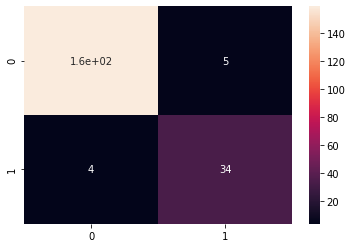

In [54]:
sns.heatmap(cm, annot=True)

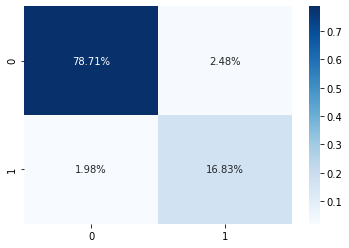

In [55]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

##### ===============================================================================

### Model Score

##### ===============================================================================

In [56]:
logit.score(x_test[keep_cols],y_test)

0.9554455445544554

In [57]:
accuracy_score(y_test,y_predict)

0.9554455445544554

In [58]:
clr=classification_report(y_test,y_predict)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       164
           1       0.87      0.89      0.88        38

    accuracy                           0.96       202
   macro avg       0.92      0.93      0.93       202
weighted avg       0.96      0.96      0.96       202



In [59]:
print(lg.coef_, lg.intercept_)

[[3.01445024 0.55255699 0.84196554 0.99880169 0.56926638]] [-5.12768799]


##### ===============================================================================

#### Extra
### #Increase threshold

## Probabilities allows us to customize strictness parameter

##### ===============================================================================

In [60]:
threshold=0.7
y_pred_new_thr=[]
for i in range(0,len(y_pred)):
#     print(y_pred[i][1])
    if y_pred[i][1]>threshold:
        y_pred_new_thr.append(1)
    else:
         y_pred_new_thr.append(0)

In [61]:
cm_new_thr=confusion_matrix(y_test,y_pred_new_thr)
score_new_thr=accuracy_score(y_test,y_pred_new_thr)
clr_new_thr=classification_report(y_test,y_pred_new_thr)
print(cm_new_thr)
print("=============================")
print(f"score: {score_new_thr}")
print("=============================")
print(clr_new_thr)


[[161   3]
 [  9  29]]
score: 0.9405940594059405
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       164
           1       0.91      0.76      0.83        38

    accuracy                           0.94       202
   macro avg       0.93      0.87      0.90       202
weighted avg       0.94      0.94      0.94       202

